**Vamos experimentar agora o algoritmo Naive Bayes?**

In [19]:
!pip -q install yellowbrick
!pip install scikit-optimize

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from skopt import BayesSearchCV

In [21]:
import pickle
with open('/content/sample_data/titanic.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [22]:
y_treino = y_treino.map({'morreu': 0, 'nao morreu': 1})
y_teste  = y_teste.map({'morreu': 0, 'nao morreu': 1})

modelo = GaussianNB()

param_grid = {
    'var_smoothing': (1e-12, 1e-6, 'log-uniform')  # busca em escala logarítmica
}

In [27]:
opt = BayesSearchCV(
    modelo,
    param_grid,
    n_iter=32,
    cv=3,
    n_jobs=-1,
    random_state=42,
    scoring='f1'
)

opt.fit(X_treino, y_treino)

print("Melhor score de validação:", opt.best_score_)
print("Score no teste:", opt.score(X_teste, y_teste))
print("Melhores parâmetros:", opt.best_params_)

# Melhor modelo já treinado
modelo = opt.best_estimator_


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.4928685419668896e-08] before, using random point [1.3499335238125592e-11]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.6130143306381068e-09] before, using random point [2.0712400390410077e-07]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [6.670427903851346e-09] before, using random point [1.6828325030258387e-09]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0022032461302992e-12] before, using random point [4.678087818147773e-10]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been 

Melhor score de validação: 0.709059315425775
Score no teste: 0.7577639751552795
Melhores parâmetros: OrderedDict({'var_smoothing': 2.888176653914472e-10})




> **Vamos testar o modelo?**



In [29]:
previsoes = modelo.predict(X_teste)

In [30]:
previsoes

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])



> **Será se o modelo acertou?**



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.7821229050279329

In [33]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[79, 26],
       [13, 61]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.7821229050279329

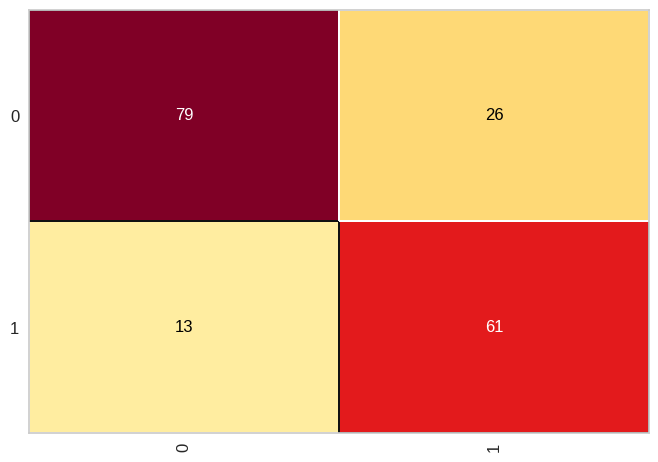

In [34]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [35]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       105
           1       0.70      0.82      0.76        74

    accuracy                           0.78       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.78      0.78       179

